# RoBERTa Base - Augmented Data - All Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
datasetPath = "/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba14/filteredData/augJoin.csv"
dataset = pd.read_csv(datasetPath, index_col=0, encoding="utf-8")
dataset.rename(columns={'text' : 'Text', 'emotion' : 'Emotion'}, inplace=True)

In [ ]:
dataset

,Text,Emotion
0,Welcome to the NFC Payoffs -Life long Vikings ...,joy
1,football is my best cope. its like chess to me,joy
2,im feeling generous ahahahaha im so morbidly f...,joy
3,Damn... that’s another thing I didn’t even thi...,disgust
4,Omg I love it,joy
...,...,...
75013,i hope all of you epers feel terrific too,joy
75014,"Claims to be ""against sexist [NAME] bros"" Hire...",anger
75015,i was feeling pretty gloomy when i started wri...,sadness
75016,i feel that so many might be far too eager to ...,joy


In [ ]:
encoded_dict = {'anger':0, 'fear':1, 'joy':2, 'disgust':3, 'sadness':4, 'surprise':5}
dataset['Emotion'] = dataset.Emotion.map(encoded_dict)

In [ ]:
dataset

,Text,Emotion
0,Welcome to the NFC Payoffs -Life long Vikings ...,2
1,football is my best cope. its like chess to me,2
2,im feeling generous ahahahaha im so morbidly f...,2
3,Damn... that’s another thing I didn’t even thi...,3
4,Omg I love it,2
...,...,...
75013,i hope all of you epers feel terrific too,2
75014,"Claims to be ""against sexist [NAME] bros"" Hire...",0
75015,i was feeling pretty gloomy when i started wri...,4
75016,i feel that so many might be far too eager to ...,2


In [ ]:
import numpy as np
training_data, validation_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
training_data = training_data.reset_index().drop(['index'], axis=1)

In [ ]:
training_data

,Text,Emotion
0,This draft is one man deep tbh. Not getting Zi...,0
1,i wrote deepika feeling very discouraged and t...,4
2,"Let's see, cash register ink, well that's a bu...",2
3,Imagine being that much of a useless parasite,0
4,im feeling bitchy and unappreciated today,0
...,...,...
60009,I'm glad you liked it :D,2
60010,I try my damndest. Hard to be sad these days w...,4
60011,I’m sorry should I have brought my make-up wip...,4
60012,i didnt feel overwhelmed by it its amazing to ...,5


In [ ]:
training_data['Emotion'].value_counts()

2    11810
4    11277
1    10453
0    10347
5     9355
3     6772
Name: Emotion, dtype: int64

In [ ]:
validation_data = validation_data.reset_index().drop(['index'], axis=1)

In [ ]:
validation_data

,Text,Emotion
0,i am feeling pretty lame and lonely,4
1,i feel really jealous,0
2,"Someone made this album, dwights a bit lanky b...",2
3,I never knew such a thing existed.,5
4,I hate losing to the Blackhawks like I love my...,0
...,...,...
7497,My mom signed me up when I was 15. Wow that wa...,2
7498,i feel uncertain and uncertain,1
7499,Because the hierarchy is afraid they’ll get bu...,1
7500,"[NAME], “How dare you show concern for the wou...",0


In [ ]:
validation_data['Emotion'].value_counts()

2    1457
4    1399
0    1310
1    1285
5    1156
3     895
Name: Emotion, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data

,Text,Emotion
0,i start to feel agitated lacking in patience a...,0
1,It's pretty stupid honestly. [NAME] clearly po...,0
2,i feel like she didnt seem to energetic or hap...,2
3,I've found out speaking about our traumas is w...,4
4,Being a complete idiot and blocking a road in ...,1
...,...,...
7497,I have a feeling [NAME] is going to be very a...,1
7498,Funny how the whole rape thing just vanished o...,2
7499,Now she’s going to find corn in her panties fo...,3
7500,They're a match made in heaven!,2


In [ ]:
test_data['Emotion'].value_counts()

4    1492
2    1477
0    1330
1    1299
5    1100
3     804
Name: Emotion, dtype: int64

# Model 

In [ ]:
training_data.shape, test_data.shape, validation_data.shape

((60014, 2), (7502, 2), (7502, 2))

In [ ]:
!pip install transformers==4.18.0
import transformers
print(transformers.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 14.9 MB/s 
     |████████████████████████████████| 6.6 MB 78.2 MB/s 
     |████████████████████████████████| 880 kB 67.5 MB/s 
     |████████████████████████████████| 182 kB 64.9 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=286ac55ed03a3cfe892549d7bd7b227d6b969d62f0a75b63590d053a940d048b
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
4.18.0


In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'roberta-base'

In [ ]:
from transformers import RobertaTokenizer

bert_tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
# Contoh Tokenisasi

id_data = 5 # Mengambil data indeks ke-5 pada dataframe

print('Kalimat:', test_data.Text[id_data])
print('BERT Tokenizer:', bert_tokenizer.tokenize(test_data.Text[id_data]))

Kalimat: Wow. Uh...good luck.
BERT Tokenizer: ['Wow', '.', 'ĠUh', '...', 'good', 'Ġluck', '.']


In [ ]:
# Contoh input formatting untuk BERT. Input formating dapat menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    training_data.Text[id_data],    # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 80,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# Fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('Kalimat\t\t:', training_data.Text[id_data])                                      # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: Cant wait to start working my placement around that area!
Tokenizer	: ['<s>', 'C', 'ant', 'Ġwait', 'Ġto', 'Ġstart', 'Ġworking', 'Ġmy', 'Ġplacement', 'Ġaround', 'Ġthat', 'Ġarea', '!', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
Input IDs	: [0, 347, 927, 2067, 7, 386, 447, 127, 13133, 198, 14, 443, 328, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

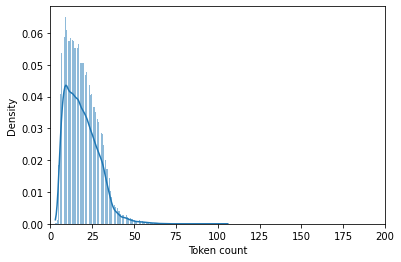

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in training_data.Text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 200]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 80

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 13.9 MB/s 
     |████████████████████████████████| 1.4 MB 70.6 MB/s 
     |████████████████████████████████| 5.8 MB 79.0 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Fine Tuning

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(training_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(validation_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFRobertaForSequenceClassification

# Load model
bert_model = TFRobertaForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=6)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
1876/1876 [==============================] - 1001s 523ms/step - loss: 0.7168 - accuracy: 0.7491 - val_loss: 0.5635 - val_accuracy: 0.8099
Epoch 2/5
1876/1876 [==============================] - 986s 525ms/step - loss: 0.5170 - accuracy: 0.8206 - val_loss: 0.5354 - val_accuracy: 0.8143
Epoch 3/5
1876/1876 [==============================] - 985s 525ms/step - loss: 0.4576 - accuracy: 0.8400 - val_loss: 0.5431 - val_accuracy: 0.8154
Epoch 4/5
1876/1876 [==============================] - 986s 525ms/step - loss: 0.4099 - accuracy: 0.8566 - val_loss: 0.5649 - val_accuracy: 0.8178
Epoch 5/5
1876/1876 [==============================] - 985s 525ms/step - loss: 0.3695 - accuracy: 0.8689 - val_loss: 0.5907 - val_accuracy: 0.8128
CPU times: user 54min 41s, sys: 10min 14s, total: 1h 4min 55s
Wall time: 1h 23min 19s


# Evaluation

In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

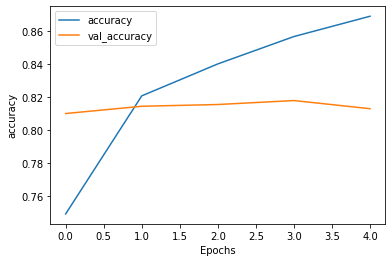

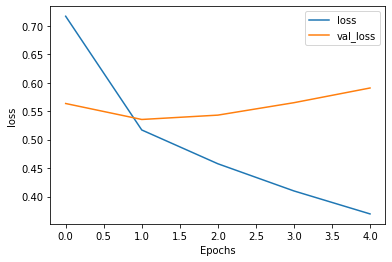

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.749092 	   0.716778 	   0.809917 	   0.563465
       2   0.820625 	   0.516983 	   0.814316 	   0.535423
       3   0.839987 	   0.457621 	   0.815383 	   0.543057
       4   0.856567 	   0.409863 	   0.817782 	   0.564904
       5   0.868864 	   0.369499 	   0.812850 	   0.590728


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

235/235 [==============================] - 40s 169ms/step - loss: 0.5767 - accuracy: 0.8094
Test Accuracy: 0.8093841671943665


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['Emotion'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8093841642228738

In [ ]:
confusion_matrix(y_true, y_pred)

array([[1031,   27,   37,  101,   71,   63],
       [  51, 1121,    4,   32,   42,   49],
       [  25,   15, 1278,   16,   28,  115],
       [ 174,   40,   14,  488,   49,   39],
       [  76,   51,   46,   56, 1222,   41],
       [  38,   38,   40,   25,   27,  932]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1330
           1       0.87      0.86      0.87      1299
           2       0.90      0.87      0.88      1477
           3       0.68      0.61      0.64       804
           4       0.85      0.82      0.83      1492
           5       0.75      0.85      0.80      1100

    accuracy                           0.81      7502
   macro avg       0.80      0.80      0.80      7502
weighted avg       0.81      0.81      0.81      7502

